# Análisis de datos Citi Bike System NYC

## Introducción

El sistema de uso compartido de bicicletas en la ciudad de Nueva York (EE.UU.) publica diariamente gran cantidad de datos de actividad sobre su uso.

Estos datos han dado lugar, como no, a algunos [análisis sobre la evolución de este servicio y posibles factores que puedan influenciar su uso](http://toddwschneider.com/posts/a-tale-of-twenty-two-million-citi-bikes-analyzing-the-nyc-bike-share-system/). En esta práctica vamos a proponer el análisis de datos resumen diarios sobre la utilización de este servicio entre julio de 2013 y noviembre de 2015.

La filosofía de esta práctica es que afiancéis los conocimientos adquiridos así como fomentar que consultéis la documentación en línea tanto de Pandas como de Seaborn. De este modo podréis familiarizaros más con los diferentes métodos disponibles para resolver los ejercicios propuestos. En cada pregunta, se ofrecen consejos sobre partes relevantes de esta documentación relacionadas con las tareas que se piden.

## Descripción de los datos

El archivo de datos que vamos a utilizar puede obtenerse de [esta url](https://raw.githubusercontent.com/toddwschneider/nyc-citibike-data/master/data/daily_citi_bike_trip_counts_and_weather.csv). Se trata de un fichero en formato CSV, que se ha creado mezclando [datos del Citi Bike System](https://www.citibikenyc.com/system-data) con [datos de la National Oceanic and Atmospheric Administration (NOAA)](https://www.ncdc.noaa.gov/cdo-web/datasets/GHCND/stations/GHCND:USW00094728/detail), sobre NYC. El fichero cuenta con las siguientes columnas:

* *date*: fecha del dato, en formato YYYY-MM-DD.
* *trips*: entero positivo, número total de viajes acumulados ese día.
* *precipitation*: entero positivo, cantidad de lluvia total registrada ese día (pulgadas).
* *snow_depth*: entero positivo, altura de nieve (pulgadas).
* *snowfall*: entero positivo, registro de precipitación en forma de nieve (pulgadas).
* *max_temperature*: entero, temperatura máxima registrada (ºF).
* *min_temperature*: entero, temperatura mínima registrada (ºF).
* *average_wind_speed*: entero, velocidad promedio del viento (MPH, millas por hora).
* *dow*: [0, 7]; código de día de la semana, 0 corresponde al domingo.
* *year*: Año del registro.
* *month*: Mes del registro.
* *holiday*: Valor lógico, indica si esa fecha es festivo (TRUE) o no (FALSE).
* *stations_in_service*: Número de estaciones para tomar o dejar bicicletas que estaban en servicio ese día.
* *weekday*: Valor lógico, indica si esa fecha corresponde a un día entre semana (de lunes a viernes, ambos inclusive).
* *weekday_non_holiday*: Valor lógico, indica si la fecha corresponde a un día entre semana festivo.

Los datos están tomados con frecuencia diaria (filas del archivo).

## Ejercicio 1

Representa mediante Pandas y Seaborn una serie temporal que muestre la evolución del número total de viajes en Citi Bike cada día, y luego por meses. ¿Se puede observar algún patrón cíclico en esta serie de valores?


### Preparación para la resolución de la entrega

Para comenzar con la entrega  vamos a cargar la librerías necesarias para la realización de la misma. Más adelante en este mismo ejercicio cargaremos la última librería necesaria Seaborn.

Al finalizar el código de librerías se introduce una línea  para que los gráficos sean representados en el notebook.





In [10]:
import numpy as np
import pandas as pd
from pandas import Series
import matplotlib.pyplot as plt

%matplotlib inline



Una vez finalizado el primer paso, vamos a trabajar ya con los datos. Lo primero es obtenerlos, descargamos los datos de la plataforma y se guardan en equipo. La librería pandas tiene una función que nos permite leer datos de tipo csv y transformarlos a formato dataframe. 

Una vez que tenemos los datos en el notebook, realizamos una estimación inicial mediante head().

In [11]:
city_bike = pd.read_csv('Desktop\daily_citi_bike_trip_counts_and_weather.csv')
city_bike.head(10)


,date,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,dow,year,month,holiday,stations_in_service,weekday,weekday_non_holiday
0,2013-07-01,16650,0.838583,0.0,0.0,77.00,71.96,3.13171,1,2013,7,False,NaN,True,True
1,2013-07-02,22745,0.078740,0.0,0.0,82.04,71.96,2.68432,2,2013,7,False,NaN,True,True
2,2013-07-03,21864,0.531496,0.0,0.0,82.94,73.04,4.25018,3,2013,7,False,NaN,True,True
3,2013-07-04,22326,0.000000,0.0,0.0,87.08,75.02,4.25018,4,2013,7,True,NaN,True,False
4,2013-07-05,21842,0.000000,0.0,0.0,89.96,75.92,4.92126,5,2013,7,False,NaN,True,True
5,2013-07-06,20467,0.000000,0.0,0.0,91.94,78.08,4.47387,6,2013,7,False,NaN,False,False
6,2013-07-07,20477,0.000000,0.0,0.0,91.94,78.08,4.25018,0,2013,7,False,NaN,False,False
7,2013-07-08,21615,0.220472,0.0,0.0,89.06,73.04,4.69757,1,2013,7,False,NaN,True,True
8,2013-07-09,26641,0.228346,0.0,0.0,87.98,73.94,3.13171,2,2013,7,False,NaN,True,True
9,2013-07-10,25732,0.000000,0.0,0.0,84.92,75.02,4.25018,3,2013,7,False,NaN,True,True


Solo estamos viendo las primeras diez filas del dataframe pero ya vemos que ciertas observaciones son NA. Hay que decir que los datos de NA corresponden a ciertas observaciones de  NOAA, para este estudio no nos afectaran, pero  en caso de tener que trabajar con estos valores deberíamos realizar una limpieza de datos. También cabe destacar que existen datos de tipo booleano, numérico y fecha.

### Definición de Series 

El fin último del ejercicio es la representación gráfica, pero primero debemos definir las series temporales sobre las que se va  a trabajar,  la primera de ellas, **serie_1**, contendrá el registro de trips en función de los días  y  **serie_2** en función de los meses.

In [12]:
serie_1 = Series(np.array(city_bike['trips']), index=city_bike['date'])
serie_1.head()

date
2013-07-01    16650
2013-07-02    22745
2013-07-03    21864
2013-07-04    22326
2013-07-05    21842
dtype: int64

Para obtener **serie_2**, debemos realizar un tratamiento de datos: primero debemos agrupar los  datos tanto por años como meses, y realizar la suma sobre las variables. Una vez que ya tenemos un dataframe con los años, meses y el número de trips de cada mes podemos crear la serie deseada.

In [13]:
agrup_serie2 = city_bike.groupby(["year", "month"]).sum()
serie_2 = Series(np.array(agrup_serie2['trips']))
print(serie_2)

0      843416
1     1001958
2     1034359
3     1037712
4      675774
5      443966
6      300400
7      224736
8      439117
9      670780
10     866117
11     936880
12     968842
13     963489
14     953887
15     828711
16     529188
17     399069
18     285552
19     196930
20     341826
21     652390
22     961986
23     941219
24    1085676
25    1179044
26    1289699
27    1212277
28     987245
dtype: int64


### Visualización


#### Visualización Pandas

Visualizamos las gráficas que son las verdaderas protagonistas  del ejercicio.  Primero se mostrará el resultado representado mediante  pandas y después cargaremos Seaborn y realizaremos con ella las gráficas homólogas.

Mostramos primero **ts_1**, esta es la gráfica correspondiente a la serie diaria.

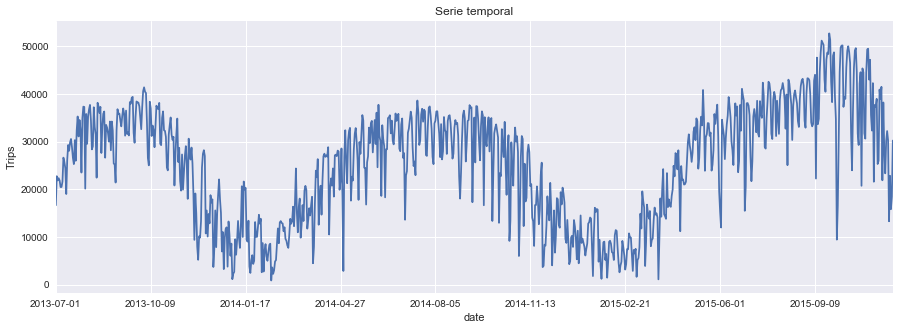

In [19]:
ts_1= serie_1.plot(figsize = (15, 5))
ts_1.set_ylabel('Trips')
ts_1.set_title('Serie temporal')

Creamos una gráfica de identicas carazterísticas para la serie mensual.

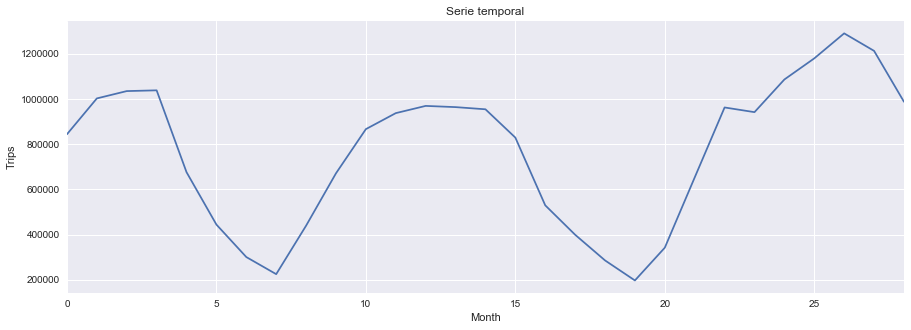

In [18]:
ts_2=serie_2.plot(figsize = (15, 5)) 
ts_2.set_ylabel('Trips')
ts_2.set_xlabel('Month')
ts_2.set_title('Serie temporal')

#### Visualización Seaborn

Como se comentó anteriormente vamos a representar las mismas figuras con Seaborn, por tanto, en la siguiente cell importamos la librería, además introducimos un sns.set(), el cual tiene por función definir parámetros estéticos, es este caso lo utilizo para definir el estilo como darkgrid.

In [4]:
import seaborn as sns
sns.set(style="darkgrid")

De nuevo presentamos primero la gráfica correspondiente a la serie diaria y seguidamente la mensual.

C:\Users\jcres\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


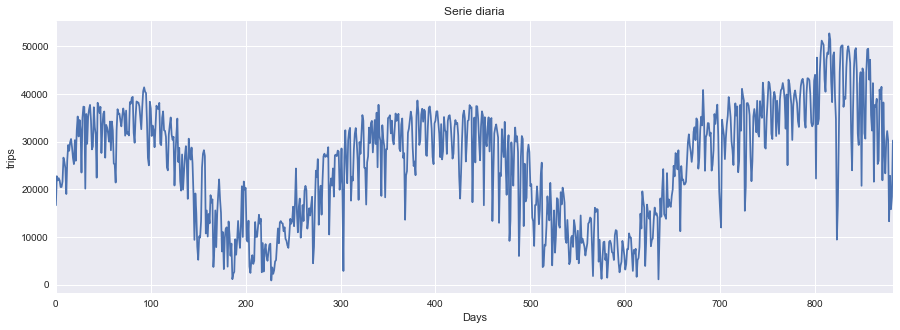

In [20]:
seaplot1 = plt.subplots(figsize=(15, 5))
seaplot1 = sns.tsplot(data=serie_1, value='trips')
seaplot1.set_title("Serie diaria")
seaplot1.set_xlabel('Days')

C:\Users\jcres\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)


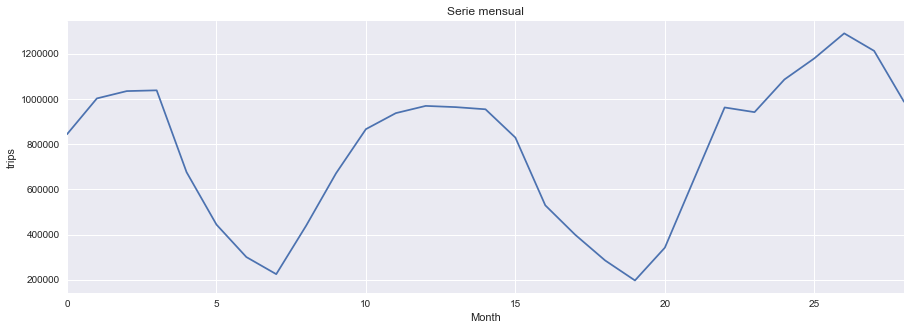

In [21]:
seaplot2 = plt.subplots(figsize=(15, 5))
seaplot2 = sns.tsplot(data=serie_2, value='trips')
seaplot2.set_title("Serie mensual")
seaplot2.set_xlabel('Month')

### Conclusiones


En ambas series se puede encontrar periodicidad, encontramos en ellas dos mínimos y tres máximos, aunque temporalmente no están equidistantes, se estudiará más adelante este comportamiento. Para comenzar el estudio de las series temporales comenzaré por la mensual debido a que así no tenemos que lidiar con la variación diaria que es debida  a factores externos como podría ser el aspecto meteorológico, pero este no es el punto de estudio de la práctica.

Vamos a comenzar el estudio de la serie mensuales por sus máximos y mínimos:

Con respecto a los valores  mínimos, encontramos en los meses 7 y 19, correspondientes a febrero de 2014 y 2015 respectivamente.
Por tanto, en los mínimos si queda reflejada esa periodicidad. Si nos centramos en el valor numérico de estos mínimos, encontramos un valor muy parejo.

El estudio de los máximos es más completo ya que contamos con  uno valor más que en el caso anterior. Encontramos máximos en los meses 3, 12 y 26, correspondientes a octubre de  2013, julio de 2014 y  septiembre de 2015 respectivamente. En este caso los máximos no tienen equidistancia temporal, el tiempo entre primero y segundo es de nueve meses y entre  segundo y tercero de catorce meses. En cuanto al valor de los máximos, primero y segundo tienen un valor parejo, sin embargo, el tercer máximo tiene un valor mucho más elevado.

Una vez analizada la serie mensual vamos a trasladar el estudio a la serie diaria esperando que ambos estudios concuerden. Como era de esperar esto ocurre, la fluctuación diaria hace más complicado el estudio. Máximos y mínimos coinciden en el rango de días visto anteriormente. En cuanto al valor de los mínimos estos  obtienen valores muy cercanos en número y en cuanto a los máximos encontramos de nuevo la situación reflejada  en la gráfica mensual. El primer máximo y el segundo marcan valores cercanos a los 40000 trips y en tercer máximo se desplaza hasta valores superiores a los 50000 trips.

Por tanto, la periodicidad existe en el sentido que cada año tenemos un máximo y un mínimo.

Al realizar gráficas con ambas librerías podemos sacar conclusiones de las representaciones en si. Los datos extraídos a simple vista de una y de otra no  muestran una gran diferencia. La introducción de las cuadriculas en el fondo de la gráfica, nos facilita  extraer el valor numérico de las variables en los máximos y mínimos, además de facilitar la comparación en dos puntos diferentes de la gráfica. 

Más adelante si encontraremos grandes diferencias con las representaciones en Seaborn pero para estas series temporales no.

## Ejercicio 2

Genera un *scatterplot* que represente el número diario de viajes respecto a la temperatura máxima registrada ese día. ¿Se puede observar alguna correlación entre ambas variables? ¿Puedes buscar una métrica de correlación adecuada para cuantificar la relación entre ambas variables?

Como en el apartado anterior voy a realizar un pequeño tratamiento de datos para conseguir el objeto que luego se va a 
representar. Para ello creo un nuevo dataframe **df2** con las columnas  date, trips, max_temperature
del dataframe original **city_bike**.

### Tratamiento de datos y visualización

Creamos un dataframe de las variables que me interesan para realizar este estudio y a partir de este momento trabajare con el, **df2**. Para la primera parte de este ejercicio genero un scatterplot  de las variables max_temperature y trips, de modo que podamos sacar conclusiones sobre la correlación entre ambas.

In [22]:
df2 = pd.DataFrame(city_bike, columns=['date','trips','max_temperature']) 

Represento el scatterplot, como eje X  he introducido un mapa de color respecto de la variable max_temperature:

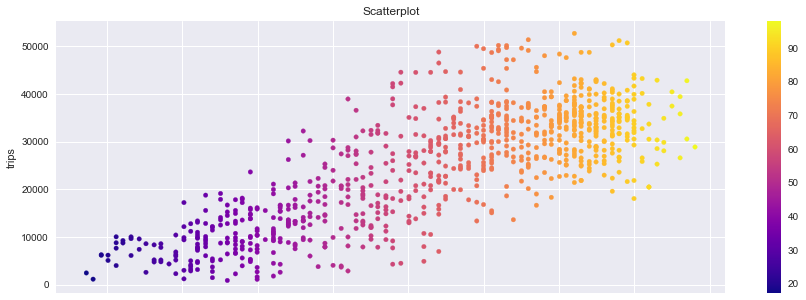

In [23]:
scatter = df2.plot.scatter('max_temperature', 'trips', c=df2.max_temperature,  cmap='plasma', figsize=(15, 5))
scatter .set_title('Scatterplot')

Pasamos a la siguiente parte, encontrar una métrica de correlación adecuada para el estudio, para ello he generado un gráfico del tipo **joinplot** mediante Seaborn, el cual incluye mucha información: genera un scatterplot y realiza el ajuste lineal de tal manera que nos devuelve **pearsonr** y el **p valor** del ajuste, además nos muestra dos histogramas con la distribución de los valores en las variables a estudio.

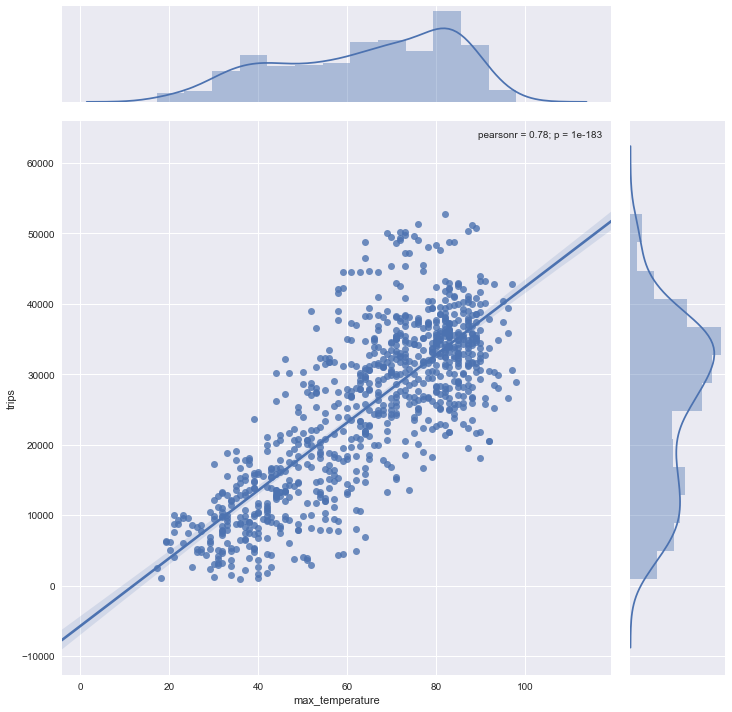

In [24]:
sns.jointplot(x="max_temperature", y="trips", data=city_bike, kind="reg", size=10)

### Conclusiones

Mediante el estudio del scatterplot podemos decir qué si existe cierta relación entre ambas variables, ambas aumentan y disminuyen de forma relacionada. Por tanto, si nos basásemos en este estudio, sí diríamos que están correlacionadas max_temperature y trips. Sin embargo, sin un desarrollo matemático no podemos asegurarlo.

Por ello mediante la segunda representación del joinplot, si nos da información más detallada. En esta gráfica podemos encontrar un sactterplot y debido al resultado visto en la gráfica anterior decido ajustar los valores a una regresión lineal lo cual nos devuelve un resultado que gráficamente parece correcto pero que matemáticamente después discutiremos. Esta gráfica también nos da otra información importante, la distribución de los puntos en la gráfica mediante el histograma y su función densidad.
En ella podemos ver que existe una zona donde tenemos muchos más datos que en el resto del espectro, esto es importante para nuestro estudio.


En cuanto a la correlación el coeficiente de Pearson tiene un valor de 0.78  y un p valor de 1e-183, estos datos nos llevan a la siguiente conclusión:

El factor que nos indica cuanto de bien están los datos representados por nuestra métrica de correlación es el coeficiente de pearson al cuadrado, lo cual nos devuelve un valor de 0.6084. Dependerá de nuestro intervalo de confianza para decir que estos datos si se correlacionan por un ajuste lineal, pero el resultado obtenido no es muy bueno.



Representa ahora las dos series de valores (viajes diarios y temperatura máxima) conjuntamente en la misma gráfica, con dos subfiguras en vertical dentro de la misma figura. ¿Podemos extraer alguna conclusión adicional sobre la relación entre ambas variables? Calcula la correlación entre ambas series usando una [ventana temporal deslizante de 90 días](http://pandas.pydata.org/pandas-docs/stable/computation.html#window-functions), con los resultados ajustados al centro de cada ventana. ¿Varían de alguna forma nuestras conclusiones?

**Consejo**: Revisa la documentación sobre la función [`pd.Series.rolling(...)`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.rolling.html), junto con los siguientes enlaces antes de resolver el ejercicio:
1. https://svds.com/avoiding-common-mistakes-with-time-series/
2. https://blog.oraylis.de/2016/03/a-common-pitfall-with-correlations-in-timeseries/

### Visualización


Mediante la librería Matplotlib podemos crear las gráficas exigidas por el enunciado. Para ello mediante el siguiente código divido el espacio de representación en dos partes donde se representaran figure(1) y figure(2):

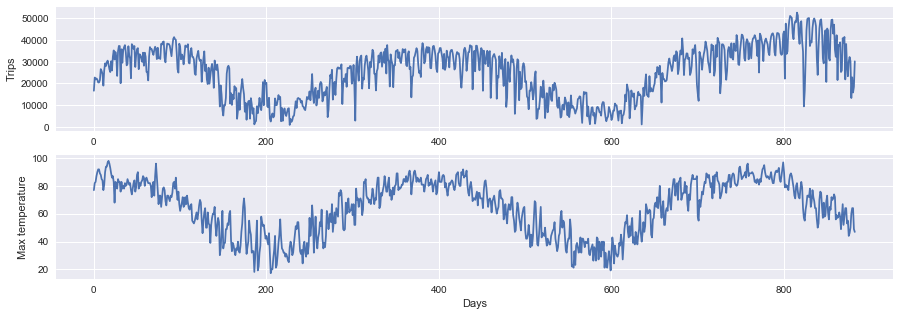

In [25]:

plt.figure(1)  
plt.figure(figsize=(15,5))
plt.title('Series temporales')
plt.subplot(211) 
plt.ylabel('Trips')
plt.plot(city_bike['trips'])


plt.subplot(212)            
plt.plot(city_bike['max_temperature'])
plt.ylabel('Max temperature')
plt.xlabel('Days')


### Conclusiones

Como en situaciones anteriores comenzamos el estudio examinando la posición de máximos y mínimos. Debido a que son series diarias tenemos las fluctuaciones que no nos dejan ver con claridad la posición exacta de estos puntos, sin embargo, si nos dejan visualizar la zona en la que se encuentran.

Los mínimos y máximos concuerdan temporalmente, aunque debido a la fluctuación no se puede asegurar con precisión. Los mínimos se corresponden con valores cercanos a los días  200 y 600 y los máximos en 400 y 800. Los movimientos de ambas series son bastante parecidos,  podemos decir que ambas variables se mueven a lo largo del espectro de la misma forma. Este resultado apoya la relación encontrada en el  apartado anterior, pero vamos a realizar un estudio matemático de este suceso en el apartado siguiente.

### Cálculo de correlación


#### Tratamiento de datos 

Creamos  **serie_3** correspondiente a la variable trips y **serie_4** correspondiente a la variable max_temperature, siendo ambas creadas a partir del dataframe inicial, con ellas ya definidas podemos pasar a realizar los cálculos de correlación.

In [26]:
serie_3 = Series(np.array(city_bike['trips']))
serie_3.head()

0    16650
1    22745
2    21864
3    22326
4    21842
dtype: int64

In [27]:
serie_4 = Series(np.array(city_bike['max_temperature']))
serie_4.head()

0    77.00
1    82.04
2    82.94
3    87.08
4    89.96
dtype: float64

#### Visualización y rolling

C:\Users\jcres\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=90).corr(other=<Series>)
  """Entry point for launching an IPython kernel.


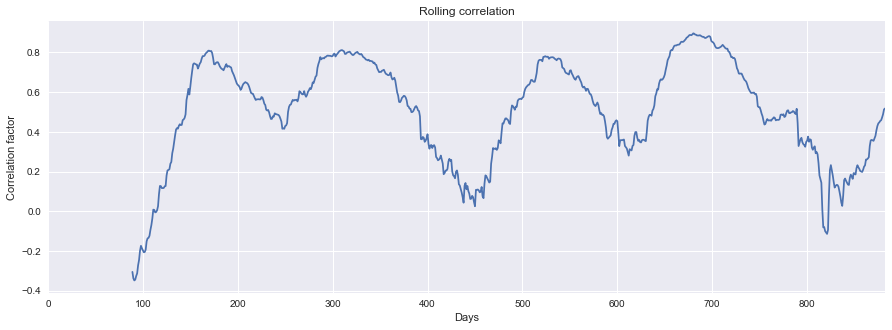

In [28]:
rol = pd.rolling_corr(serie_3, serie_4, window=90).plot(figsize=(15, 5))
rol.set_ylabel('Correlation factor')
rol.set_xlabel('Days')
rol.set_title('Rolling correlation')

#### Conclusiones

Esta gráfica nos muestra la correlación de una forma diferente a la que se nos a presentado hasta ahora. Sobre ella podemos destacar ciertas características:

En el comienzo de ambas gráficas tenemos correlación negativa debido a que ambas series se mueven con tendencias diferentes, pero este valor no es muy influyente ya que no alcanza valores de -0.4.

El siguiente paso será fijarnos en los picos de correlación que se encuentran en valores superiores a 0.8 y entre ellos tenemos variaciones de la correlación, pero en unos valores aceptables.

Tenemos por último que ver los mínimos de correlación a que valores corresponden, entre los días 400 y 500 tenemos una caída de la correlación muy grande y pasando el día 800 tenemos otra caída incluso más importante. 

A mi modo de ver, con esta gráfica podemos decir que para ciertos valores tenemos una gran correlación, pero que en valores intermedios esta disminuye y existen zonas donde la correlación se acerca a valores casi nulos. Por tanto, si encontramos correlación para ciertas partes del espectro que corresponden a máximos y mínimos, pero no en global.

Entonces, ¿Este resultado a que es debido? Ambas series comparten tendencia lo cual quiere decir que es normal que se encuentren ciertos valores en los cuales tengamos una correlación muy fuerte, tal y como se explica en los enlaces proporcionados para la realización del ejericio. En los cuales se habla de causalidad. Solo porque matemáticamente dos series tengan un factor de correlación importante no significa que una sea consecuencia de la otra. 

Desde mi punto de vista en este caso no tenemos causalidad ya que existe cierta relación en el aumento de temperaturas con el número de trips realizados en el servicio y además es un resultado que se mantiene en el tiempo. Por tanto, no creo que la correlación sea un resultado definitivo pero lo que ciertamente descarto es que estas series den un resultado de correlación debido a la causalidad.


## Ejercicio 3

Escoja un diagrama adecuado para representar la diferencia de valores entre el número total de viajes registrados en los días laborables y los registrados en días no laborables (fines de semana y festivos entre semana). ¿A qué conclusiones podemos llegar?


### Tratamiento de datos y visualización


Debemos trabajar con la variable **weekday_non_holiday**, el resultado de False engloba tanto los días que son fin de semana como los que son no laborales entre semana, en el valor  True, estaran guardados los días entre semana que son laborales.

In [29]:
data_festivos = city_bike.groupby([ "weekday_non_holiday"]).sum()
data_festivos

,trips,precipitation,snow_depth,snowfall,max_temperature,min_temperature,average_wind_speed,dow,year,month,holiday,stations_in_service,weekday
weekday_non_holiday,,,,,,,,,,,,,
False,5742080,27.188975,275.196640,23.070868,17604.84,13563.30,1406.809315,825,555910,1934,24.0,92000.0,24.0
True,16510165,79.893706,584.842012,84.606359,39148.76,30334.88,3192.108041,1822,1222602,4205,0.0,201362.0,607.0


Sin realizar ninguna gráfica el valor numérico ya nos indica que tenemos la mayoría de los viajes en días laborales, ya que superan  en un orden de magnitud a los días no laborales. Vamos a realizar una gráfica donde podamos ver este resultado reflejado. Decido utilizar un swarmplot de la librería Seaborn debido a que se obtiene un resultado muy claro y a simple vista muy esclarecedor. 

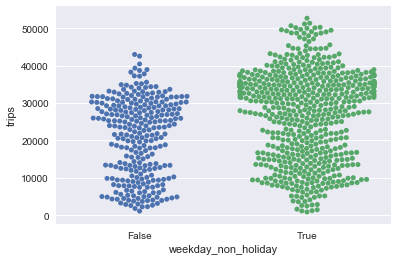

In [30]:
 sns.swarmplot(x="weekday_non_holiday", y="trips", data= city_bike)


### Conclusiones 

En swarmplot  ya se puede ver la dimensión de la diferencia de viajes. Los días no laborales solo alcanzan valores de 40000 trips en tres ocasiones, sin embargo, los días laborales  registran valores incluso superiores a 50000 trips. Además de ello, por debajo de 40000 trips diarios tenemos mayor número de viajes en laborales lo que traducido a gráfica se corresponde con más puntos en su distribución.


Este estudio en términos del estudio real quiere decir que el servicio de city bike tiene un uso muchísimo mayor en días laborales, se puede en cierta manera imaginar debido a estos datos que este servicio es usado por mucha gente como medio de transporte para ir al trabajo. 

Podemos hacer una suposición para ver los números de esta idea:

Si comparamos el número de viajes los días laborales se realizaron 10768085 viajes más, si suponemos que el número de viajes en días festivos es debido a gente que también usa el servicio en días laborales pero no como medio de transporte al trabajo, nos indica que de media se realizan 10768085 viajes por razones laborales. Si dividimos este valor entre los días laborales obtenemos que diariamente se realizaron 17740 viajes diarios. Todo esto es una suposición ya que no se puede asegurar que todas estas personas usaron el servicio para ir al trabajo, pero nos da cierta idea de la magnitud de la diferencia real.

## Ejercicio 4

Usando toda la serie de valores que tenemos disponible, ¿cuál es el día de la semana en que realizan en total más viajes en Citi Bike? ¿Y el que menos? ¿Hay diferencias si desglosamos este gráfico por años?


### Tratamiento de datos 

Para la realización de este ejercicio debemos realizar un estudio sobre una variable de la que no hemos hablado todavia. El dataframe tiene una variable llamada pow que toma por valores [0,7]. Cabe destacar antes del estudio que el valor cero se corresponde con el domingo, para evitar malentendidos.

Agrupamos el dataframe por días y así podemos descubrir cual es el dia que más viajes se realizan en la muestra. Debido a que esta ordenadas de 0 a 7 no buscamos el máximo numérico sino la posición del máximo mediante argmax().




In [31]:
dia =city_bike.groupby( ["dow"] ).sum()

max_semanal = dia["trips"].argmax()

max_semanal

3

El resultado obtenido es la posición 3, que si la ponemos en contexto dentro del vector pow nos indica que el día de máximos viajes es el miercoles.

Realizamos el mismo estudio para el mínimo, obteniendo como día de menos viajes el domingo.

In [32]:
min_semanal = dia["trips"].argmin()

min_semanal

0

### Visualización

Para el estudio gráfica vamos a realizar tres visualizaciones, en la primera mostraré el histograma donde se puede ver como se distrubuyen las medidas con facilidad. Seguidamente represento un barplot con el fin de observar la media de trips diaria  y para acabar realizo un swarmplot en el cual se podra observar cuales son los máximos  y mínimos con facilidad

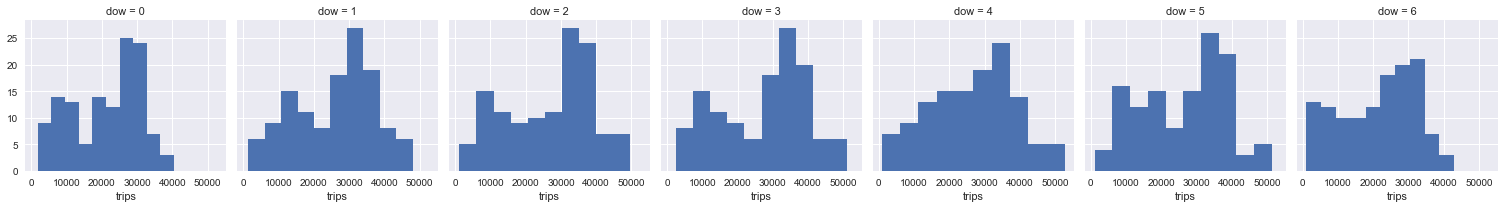

In [33]:
g = sns.FacetGrid(city_bike, col="dow")
g.map(plt.hist, "trips");



Los resultados obtenidos del tratamiento de datos nos muestran que el mínimo número de viajes se encuentra localizado en pow=0, gráficamente este resultado no es tan sencillo de alcanzar en un histograma, otras gráficas como por ejemplo pow=6 nos pueden llevar a confusión. En cuanto al máximo se encuentra localizado en pow=3. Por tanto, si utilizamos estos histogramas para visualizar el máximo y mínimo de trips no es una buena elección, pero si para conocer como se han distribuido los trips en estas unidades de tiempo. El miercoles se alza con el máximo de trips debido a la cantidad de miercoles que se realizan  trips entre 30000 y 40000 en número. El mínimo del domingo es debido a que ningún domingo rompe la barrera de los 40000 trips y por debajo de 30000 trips se alcanza un mayor número de veces los sabados.

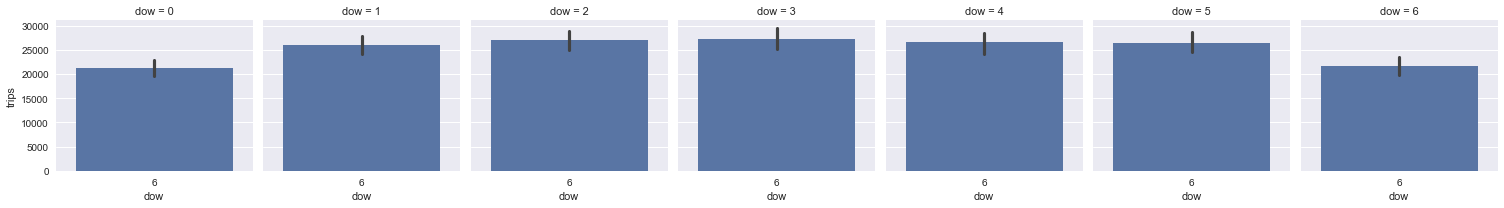

In [34]:
g2 = sns.FacetGrid(city_bike, col="dow", size=3)
g2.map(sns.barplot, "dow", "trips")

Este gráfico también me parece interesante, nos muestra la media de los viajes donde se encuentra cada día, en este caso concuerda con el mínimo de viajes y máximo. Los miercoles esta media se situa en valores superiores a 30000 trips y los domingos en valores cercanos a 20000, es decir, hay una diferencia considerable. 

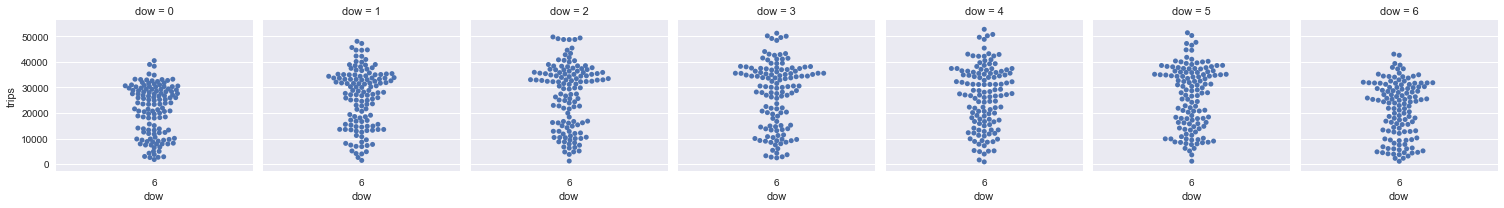

In [35]:
g3 = sns.FacetGrid(city_bike, col="dow")
g3.map(sns.swarmplot, "dow", "trips")

Este gráfico nos da la información de máximos y mínimo de una manera más sencilla, se aprecia que dow=0 es el mínimo, aunque como se comentó en la gráfica anterior dow=6 también tiene una distribución de puntos parecida, pero es un poco más numerosa.  En cuanto al máximo nos encontramos un escenario parecido, el máximo se encuentra en dow=3, dow=2 nos podría hacer dudar. 


### Estudio anual

Realizamos  el estudio centrándonos en cada año por separado, es decir, realizamos el estudio para el años 2013, 2014 y 2015.


#### Año 2013


Filtramos del data.frame inicial aquellos datos que correspondan solo al año 2013. Con ellos calculamos en que fecha tuvimos el máximo y mínimo de trips y después agrupamos por la variable pow y vemos cual es el máximo y mínimo del día de la semana.

In [36]:
data2013 = (city_bike[(city_bike["year"]==2013)])
maxdia2013 = data2013["trips"].argmax()
mindia2013 = data2013["trips"].argmin()


In [37]:
data2013.date.iloc[maxdia2013]


'2013-10-02'

In [39]:
data2013.date.iloc[mindia2013]

'2013-12-25'

Agrupamos el data.frame **data2013** por la variable pow y calculamos los días de la semana que tuvieron mayor y menor número de viajes este año. 

In [38]:
agrup2013=data2013.groupby( ["dow"] ).sum()
maxdia2013anual = agrup2013["trips"].argmax()
mindia2013anual = agrup2013["trips"].argmin()

Durante el año 2013 el mayor número de viajes se realizaron los miercoles.

In [40]:
maxdia2013anual 

3

Durante el año 2013 el menor número de viajes se realizaron los domingos.

In [41]:
mindia2013anual

0

##### Visualización

Seguiremos a partir de ahora el mismo procedimiento gráfico que el realizado en el apartado anterior.

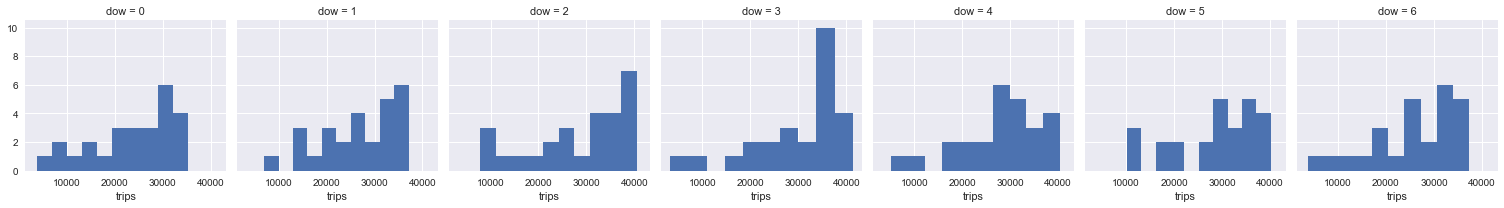

In [42]:
g2013 = sns.FacetGrid(data2013, col="dow", size=3)
g2013.map(plt.hist, "trips")


En esta gráfica se puede apreciar los resultados obtenidos mediante el tratamiento de datos realizado sobre el dataframe anterior. A simple vista es fácil ver que pow=3 tiene el mayor número de viajes. En cuanto al mínimo pow=0, gráficamente tendríamos más discusión porque no esta tan claro que dow=0 en global, sea por ejemplo menor que dow=1 o dow =5. El miercoles de nuevo se alza como máximo debido a la alta concentración de trips entre 30000 y 40000 diarios, que es ampliamente superior al resto de días.



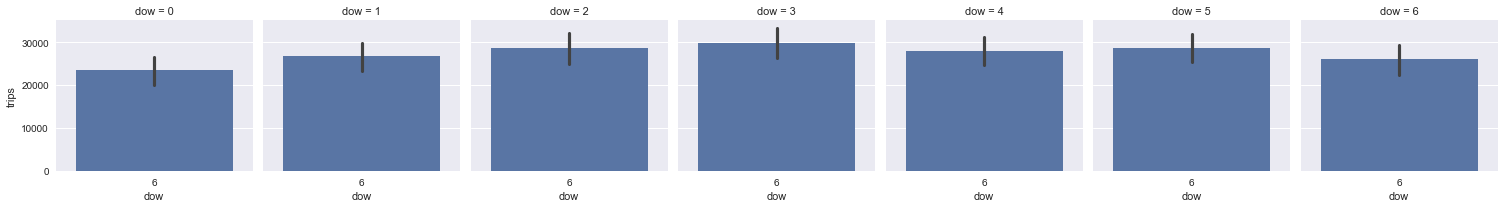

In [43]:
g2_2013 = sns.FacetGrid(data2013, col="dow", size=3)
g2_2013.map(sns.barplot, "dow", "trips")

Encontramos unos valores de la media muy parecidos a los obtenidos en el estudio de los datos conjuntos al completo. De nuevo los máximos y mínimos se localizan en miercoles y domingo respectivamente.

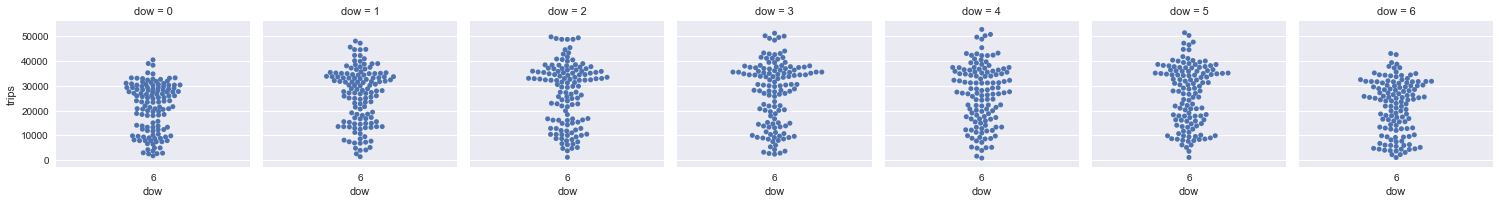

In [34]:
g3_2013= sns.FacetGrid(city_bike, col="dow")
g3_2013.map(sns.swarmplot, "dow", "trips")

El máximo en pow=3 no estan claro como podría parecer en la gráfica de histogramas porque en ella se encuentra un pico de viajes muy alto entre 30000 y 40000, sin embargo, no encontramos muchos viajes fuera de esta medida lo cual hace que al verlo en global no nos de un resultado claro. En cuanto al mínimo, es claro en esta gráfica que se localiza en dow=0 de nuevo la gráfica de histogramas lleva a confusiones respecto al total este es otro claro ejemplo.



#### Año 2014


Filtramos el dataframe inicial aquellos datos que correspondan solo al año 2014. Con ellos calculamos en que fecha tuvimos el máximo y mínimo de trips y después agrupamos por la variable pow y vemos cual es el máximo y mínimo del día de la semana.

In [87]:
data2014 = (city_bike[(city_bike["year"]==2014)])


In [36]:
data2014 = (city_bike[(city_bike["year"]==2014)])
maxdia2014 = data2014["trips"].argmax()
mindia2014 = data2014["trips"].argmin()


En este caso no puedo realizar el iloc[] realizado en el apartado anterior, ya que me tomaría el index 1 que es el correspondiente al 184 del dataframe por tanto, me daria un resultado diferente.

In [74]:
maxdia2014

381

Correspondiente con 2014-07-17.

In [75]:
mindia2014

227

Correspondiente con 2014-02-14.

Agrupamos el data.frame **data2014** por la variable pow y calculamos los dias de la semana que tuvieron mayor y menor número de viajes este año. 

In [52]:
agrup2014=data2014.groupby( ["dow"] ).sum()
maxdia2014anual = agrup2014["trips"].argmax()
mindia2014anual = agrup2014["trips"].argmin()

Durante el año 2014 el mayor número de viajes se realizaron los martes.

In [53]:
maxdia2014anual

2

Durante el año 2014 el menor número de viajes se realizaron los viernes.

In [54]:
mindia2014anual

6

Respecto a la tendencia que se venia obteniendo tenemos un cambio.

##### Visualización

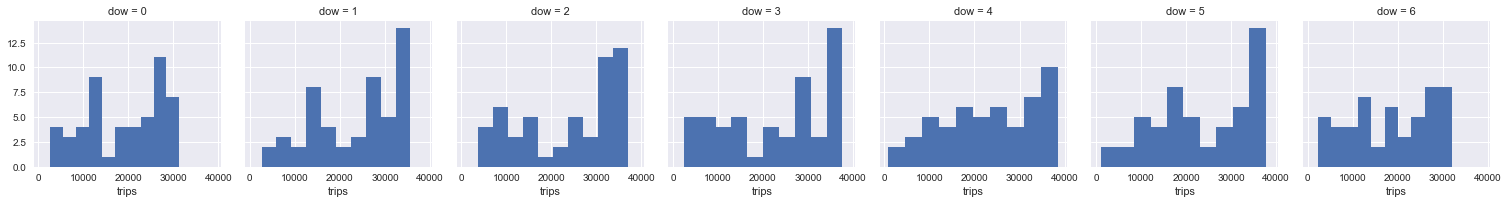

In [55]:
g2014 = sns.FacetGrid(data2014, col="dow")
g2014.map(plt.hist, "trips");


Los resultados extraidos del análisis de datos nos indican que el mínimo y máximo de trips se localizan en dow=6 y dow =2 respectivamente. Que el máximo se encuentre en dow=2 no es lo esperado al ver esta gráfica ya que nisiquiera tiene el pico más alto en viajes entre 30000 y 40000, en cuanto al mínimo queda reflejado con basante claridad. Graficamente este gráfico no nos da uns visión clara de la situación.

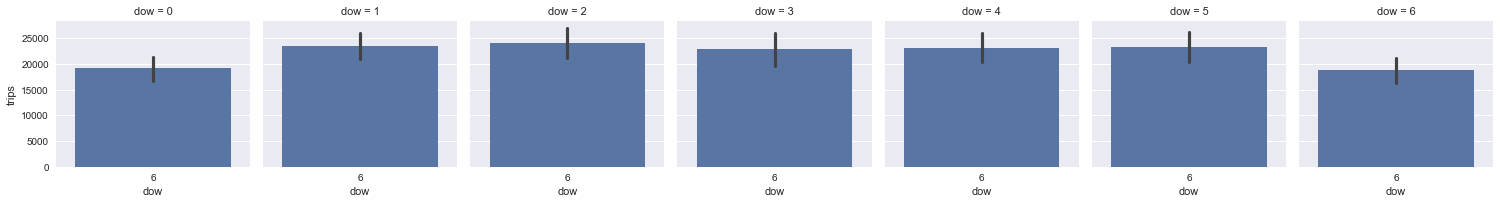

In [37]:

g2_2014 = sns.FacetGrid(data2014, col="dow")
g2_2014.map(sns.barplot, "dow", "trips");

Sin embargo, esta gráfica es mucho mas esclarecedora en el aspecto de máximos y mínimos. Respecto a la gráfica de otro estudios tiene valores inferiores, luego veremos en las gráficas de comparación de los años.

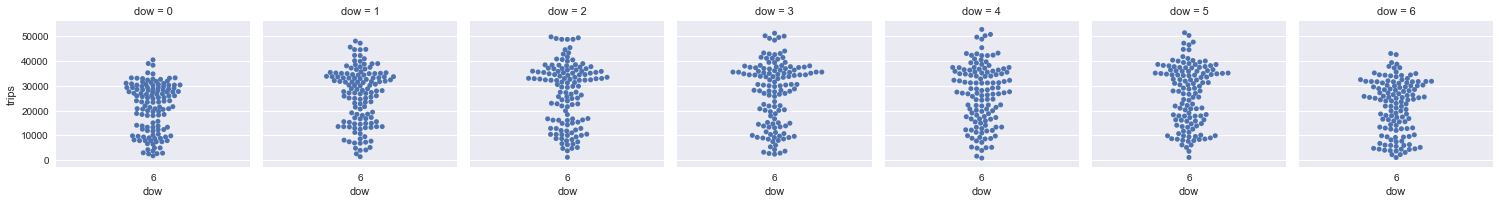

In [56]:
g3_2014= sns.FacetGrid(city_bike, col="dow")
g3_2014.map(sns.swarmplot, "dow", "trips")

En esta última gráfica dow=6 presenta el mínimo total de viajes debido a que muestra pocos puntos respecto al resto de gráficas, dow=0 tiene un valor cercano como se a podido ver en el resto de gráficas. El máximo en este caso se nos a desplazado al mártes, aunque como se ha repetido durante el estudio con no mucha diferencia de valor.

#### Año 2015


Filtramos del dataframe inicial aquellos datos que correspondan solo al año 2013. Con ellos calculamos en que fecha tuvimos el máximo y mínimo de trips y después agrupamos por la variable pow y vemos cual es el máximo y mínimo del día de la semana.

In [57]:
data2015 = (city_bike[(city_bike["year"]==2015)])


In [85]:
data2015 = (city_bike[(city_bike["year"]==2015)])
maxdia2015 =data2015["trips"].argmax()
mindia2015 = data2015["trips"].argmin()


De nuevo para localizar la fecha tenemos el mismo problema que en el apartado anterior.

In [76]:
maxdia2015

815

Correspondiente con  2015-09-24

In [77]:
mindia2015

635

Correspondiente con 2015-03-28.

Agrupamos el data.frame **data2015** por la variable pow y calculamos los dias de la semana que tuvieron mayor y menor número de viajes este año. 

In [61]:
agrup2015=data2015.groupby( ["dow"] ).sum()
maxdia2015anual = agrup2015["trips"].argmax()
mindia2015anual = agrup2015["trips"].argmin()

Durante el año 2015 el mayor número de viajes se realizaron los miercoles.

In [62]:
maxdia2015anual

3

Durante el año 2015 el menor número de viajes se realizaron los miercoles.

In [63]:
mindia2015anual

0

##### Visualización

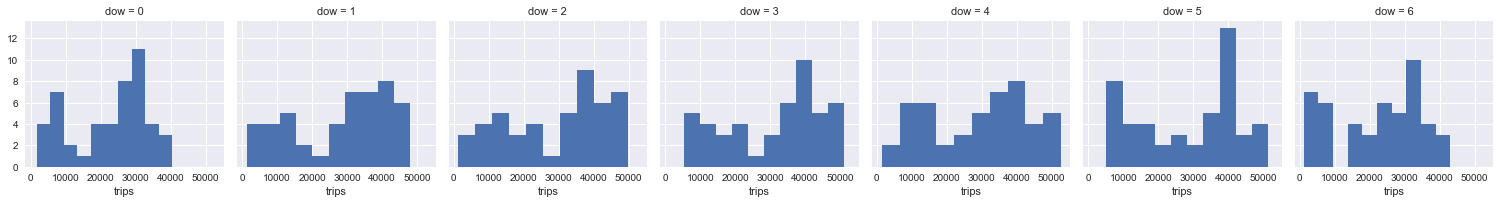

In [64]:
g2015 = sns.FacetGrid(data2015, col="dow")
g2015.map(plt.hist, "trips");


Los resultados extraidos del tratamiento de datos nos indican como máximo el miercoles y mínimo el domingos. En esta gráfica el mínimo si se puede dilucidar debido a que no tiene días con viajes superiores a los 40000, en cuanto al máximo, no se puede asegurar en esta gráfica que tenga un valor que lo distancie del resto. La siguiente gráfica esclarecera esta situación:

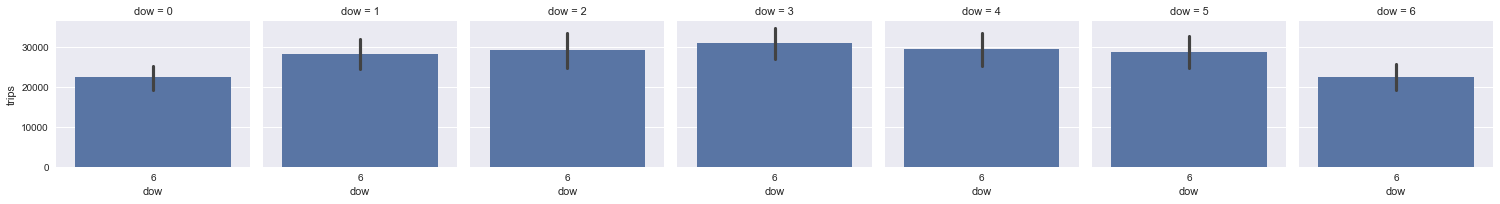

In [46]:

g2_2015 = sns.FacetGrid(data2015, col="dow")
g2_2015.map(sns.barplot, "dow", "trips");

Los máximo y mínimos en media aquí se encuentras diferenciados respecto al resto, cabe destacar que se mueven de nuevo el número de viajes es comparables al estudio del espectro completo.

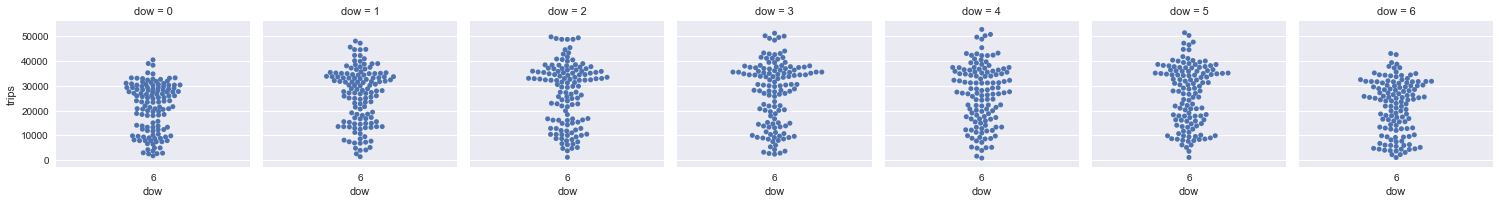

In [65]:
g3_2015= sns.FacetGrid(city_bike, col="dow")
g3_2015.map(sns.swarmplot, "dow", "trips")

Como era de esperar la diferencai del máximo esta muy ajustada por los días contiguos a el. En cuanto al mínimo el finde semana como viene siendo tónica habitual es este estudio registra valores inferiores a los días entre semana y de nuevo, el mínimo se posiciona en los domingos.

#### Estudio conjunto


Por último voy a realizar una pequeña comparación entre los tres años a estudio, en este caso, la periodicidad encontrada en otros apartados de la entrega se debe hacer también visible.


In [66]:
año =city_bike.groupby( ["year","dow"] ).sum()



Por años, los míercoles de 2015 fueron los días que más viajes se realizaron.

In [67]:
max_anual_dia = año["trips"].argmax()
max_anual_dia


(2015, 3)

Y los domingos de 2013 los días que menos.

In [68]:
min_anual_dia=año["trips"].argmin()

min_anual_dia

(2013, 0)

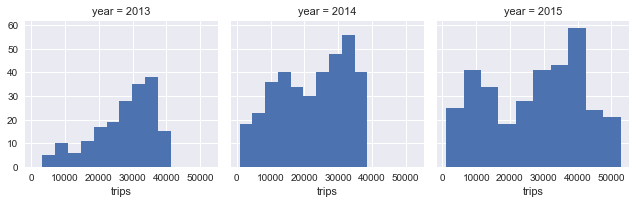

In [9]:
t = sns.FacetGrid(city_bike, col="year")
t.map(plt.hist, "trips");


Por último, en esta grafica muestro como variarin los viajes a lo largo de todo el estudio, es claro que existe cierta periodicidad, en  máximos y mínimos, pero no es su valor. El número de viajes fluctua bastante el 2014 respecto a 2013 tenemos una caida bastante acusada ya que el mínimo de 2013 es mayor que el máximo de 2014 y en 2015 alcanzamos el máximo  con los miercoles por encima de 30000 viajes.

### Conclusiones:

El estudio global de todos los años en conjunto marca como máximo los miercoles y como mínimo el domingo. En el caso de los años 2015 y 2013 esta tendencia continua, sin embargo, para 2014 tenemos un desplazamiento de estos días a mínimo el sábado y máximo el martes. Aunque solo se desplaza un día sigue con la filosofia encontrada en el ejercicio 3, el máximo en días laborales y el mínimo en fin de semana.

En cuanto al númeor de viajes, en 2013 encontramos valores inferiores a los del resto de años en un factor significativo.